In [181]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('diabetes.csv')

# View dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Separating input and output
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df[['Outcome']].values

# Standardization of features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Create random forest classifier object
randomforest = RandomForestClassifier(
    # criterion='entropy',
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train model
model = randomforest.fit(x, y)

In [183]:
# Calculate feature importances 
importances = model.feature_importances_

# Sort feature importances in descending order -> 1.Glucose  2.BMI  3.Age
indices = np.argsort(importances)[::-1]

# List of feature names in the same order as the dataset columns
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Loop through sorted feature indices (from most to least important)
for i in indices:
        # Print feature name and its importance (rounded to 3 decimals)
    print(f"{feature_names[i]}: {importances[i]:.3f}")

Glucose: 0.234
BMI: 0.177
Age: 0.136
DiabetesPedigreeFunction: 0.129
BloodPressure: 0.091
Pregnancies: 0.082
SkinThickness: 0.081
Insulin: 0.070


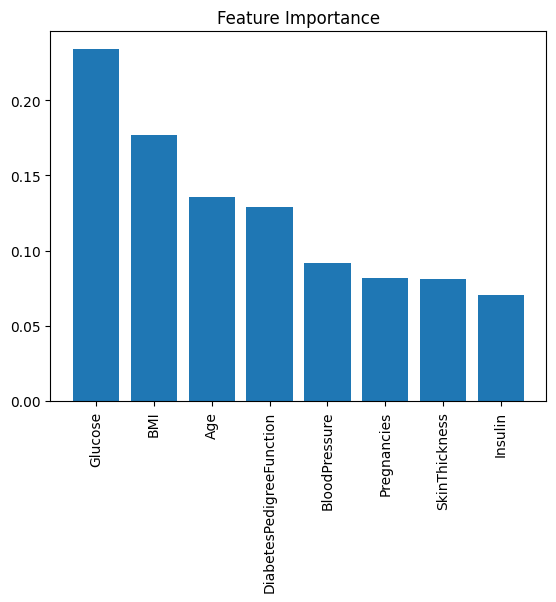

In [184]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=90)

# Show plot
plt.show()

In [185]:
accuracy_score = cross_val_score(model, x, y, scoring='accuracy')

print("Accuracy score of RandomForest: mean =", accuracy_score.mean())

# Accuracy score of Logistic Regression algorithm 
accuracy_logistic = np.array([0.77272727, 0.74675325, 0.75324675, 0.81045752, 0.77777778])
print("Accuracy of Logistic Regression: mean =", accuracy_logistic.mean())

# Accuracy score of SVM algorithm 
accuracy_svm = np.array([0.76623377, 0.75974026, 0.75974026, 0.81699346, 0.76470588])
print("Accuracy of SVM: mean =", accuracy_svm.mean())


Accuracy score of RandomForest: mean = 0.7657074951192598
Accuracy of Logistic Regression: mean = 0.772192514
Accuracy of SVM: mean = 0.7734827259999999


In [186]:
# Recall score
recall = cross_val_score(model, x, y, scoring="recall")
print("Recall score of RandomForest: mean =", recall.mean())

Recall score of RandomForest: mean = 0.5823899371069182


In [187]:
# Precision score
precision = cross_val_score(model, x, y, scoring="precision")
print("Precision score of RandomForest: mean =", precision.mean())

Precision score of RandomForest: mean = 0.6995147222768706


In [188]:
# F1 score 
f1 = cross_val_score(model, x, y, scoring="f1")
print("F1 score of RandomForest: mean =", f1.mean())

F1 score of RandomForest: mean = 0.6344998178852519
